# Exponential Smoothing(Time Series Forecasting)


Exponential Smoothing is a time series forecasting method for univariate data, and its concept can be extended to capture the trend and seasonality exhibited in the dataset.
Exponential smoothing works on the concept of weighted average for predicting the future values where exponentially decreasing  function is used for determination of weights. The more recent the observation is obtained, the higher weight would be assigned to it, and the weight would reduce exponentially for older observations.



## Types of Exponential Smoothing

There are three types of Exponential Smoothing based on the number of hyperparameters employed during caoturing trends/seasonality of data;- 

  > • **Simple Exponential Smoothing <br>
   • Double Exponential Smoothing <br>
   • Triple Exponential Smoothing**


In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
#setting environment and removing unneccesary warnings 
np.warnings.filterwarnings('ignore')
%matplotlib inline

## Dataset

I have used dataset from kaggle platform. You can get the dataset link [here](https://www.kaggle.com/mvsfnig/time-series-pam?select=a8_b_IPI.csv) .Other beginner level time-series datasets also can be retrieved from here.

In [3]:
#reading the dataset
df = pd.read_csv('a8_b_IPI.csv')

In [4]:
#head of the dataset
df.head()

,Time,ipialiment
0,1985-01-31,84.15
1,1985-02-28,71.53
2,1985-03-31,72.55
3,1985-04-30,67.02
4,1985-05-31,72.61


In [5]:
#renaming the first column
df=df.rename(columns={'Time': 'Date'})

In [6]:
df.head()


,Date,ipialiment
0,1985-01-31,84.15
1,1985-02-28,71.53
2,1985-03-31,72.55
3,1985-04-30,67.02
4,1985-05-31,72.61


In [7]:
#changing the datatype of 'Date' column
df['Date'] = pd.to_datetime(df.Date)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
Date          186 non-null datetime64[ns]
ipialiment    186 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [9]:
#setting index
df=df.set_index('Date')
df.index.freq = 'M'

In [10]:
df.head()

,ipialiment
Date,
1985-01-31,84.15
1985-02-28,71.53
1985-03-31,72.55
1985-04-30,67.02
1985-05-31,72.61


In [11]:
# adjusting the size of plots
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

Text(0, 0.5, 'Ipialiment')

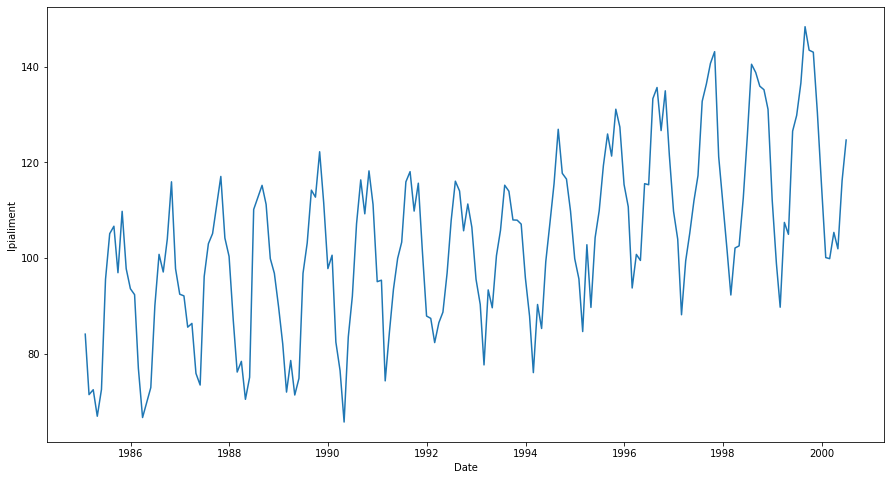

In [12]:
#plotting the dataset
plt.plot(df,label=False)
plt.xlabel('Date')
plt.ylabel('Ipialiment')

We can see that our time series dataset shows a fairly increasing linear trend and even has seasonality of certain duration. We will visualize trend and seasonality more during double and triple exponential smoothing.

In [13]:
#splitting train and test data
train_data= df.iloc[:168]
test_data = df.iloc[168:]

In [14]:
train_data.tail()

,ipialiment
Date,
1998-08-31,138.75
1998-09-30,135.90
1998-10-31,135.16
1998-11-30,131.06
1998-12-31,112.08


In [15]:
test_data.head()

,ipialiment
Date,
1999-01-31,98.90
1999-02-28,89.77
1999-03-31,107.46
1999-04-30,104.98
1999-05-31,126.52


# Simple Exponential Smoothing

Simple Exponential Smoothing, is a time series forecasting method for univariate data which does not consider the trend and seasonality in the input data while forecasting. The prediction is just the weighted sum of past observations.
It requires a single parameter, called alpha (α), also called the smoothing factor.


\begin{align*}
\hat{y}_{t+1} &= 
\alpha y_{t} + 
\alpha(1-\alpha) y_{t-1} + 
\alpha(1-\alpha)^2 y_{t-2} + 
\alpha(1-\alpha)^3 y_{t-3} \\ 
&\quad + \cdots + 
\alpha(1-\alpha)^{t-1} y_{1} + 
\alpha(1-\alpha)^{t} \hat{y}_{1} + 
\end{align*}

  >where $ \alpha $ is smoothing parameter( $0 \leq \alpha \leq 1$ ).
    
### Hyperparameter:
> -  $ \alpha $ - smoothing factor for a level

The weights decrease rate is controlled by the smoothing parameter α. If α is large (i.e., close to 1), more weight is given to the more recent observations.
- α=0: the forecasts of all future values are equal to the average (or “mean”) of the historical data, which is called Average method.
- α=1: simply set all forecasts to be the value of the last observation, which is called Naive method in statistics.


Here we have run two variants of the **Simple Exponential Smoothing(SES)**:-<br>
>**SES_fit1:**  We have explicitly chosen a value of smoothing parameter. <br>
>**SES_fit2:**  we have used the auto-optimization that allow statsmodels to automatically find an optimized value for us. This is the recommended approach.
<br>

However, a manual way of choosing the value of $ \alpha $ based on some mathematical formulation is discussed [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows) .


### Fitting and Forecasting(SES)

In [16]:
#fitting SES on the train data
SES_fit1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.33)
SES_fcast1 = SES_fit1.forecast(18)

In [17]:
SES_fit2= SimpleExpSmoothing(train_data).fit()
SES_fcast2 = SES_fit2.forecast(18)

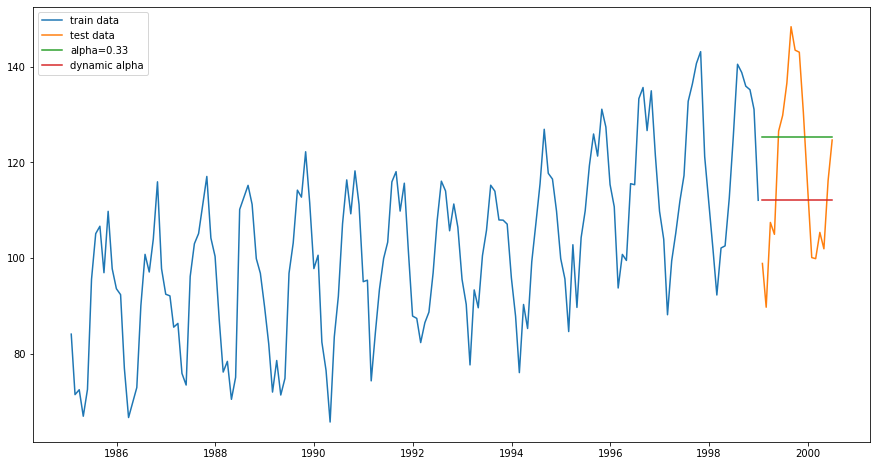

In [18]:
#plotting the results
plt.plot(train_data,label='train data')
plt.plot(test_data,label='test data')
plt.plot(SES_fcast1,label='alpha=0.33')
plt.plot(SES_fcast2,label='dynamic alpha')
plt.legend()
plt.show()

As stated earlier, **Simple Exponential Smoothing** does **not** takes **trend and seasonality** into account, it just evaluates **simple weighted average** of test data and produces a result. Therefore, we have obtained a straight line parallel to X-axis as prediction.
<br>

We have got two results because of two values of smoothing parameter $ \alpha $, one explicitaly fixed by us, while the other dynamiclly allocated by the algorithm. Though, we can rely on the dynamically allocated $\alpha$, yet we can get improved results by hit and trial explicit allocation.

In [19]:
#evaluating the error metric
from sklearn.metrics import mean_squared_error
SES_rmse1 = np.sqrt(mean_squared_error(test_data,SES_fcast1))
SES_rmse2 = np.sqrt(mean_squared_error(test_data,SES_fcast2))
print("RMS Error for α = 0.33: ",SES_rmse1)
print("RMS Error for dynamic α: ",SES_rmse2)

RMS Error for α = 0.33:  18.892408074989728
RMS Error for dynamic α:  18.368333408946558


We can observe that dynamically allocated $\alpha$ provides slightly better RMS score than explicitlly allocated $\alpha$.

## Double Exponential Smoothing

**Double Exponential Smoothing(DES)** is an extension of **SES** concept. It incorporates level as well as trend of the univariate time-series.In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta ($\beta^*$).
<br>
The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.
>**•Additive trend:**DES with linear trend <br>
 **•Multiplicative trend:**DES with exponential trend
 
#### Hyperparameters
>  •$\alpha$: Smoothing factor for level.<br>
   •$\beta^*$:  Smoothing factor for trend


   where,<br>
                      ( $0 \leq \alpha \leq 1$ ) and ( $0 \leq \beta^* \leq 1$ )<br>
                      
### Additive trend
**Double Exponential Smoothing** with **additve trend** is  also popularly reffered as **Holt's Linear Trend Model**, named after it's developer. A mathematical formulation of the same is depicted below:
                        \begin{align*}
\text{Level: }   \; \quad \ell_t &=  \alpha y_t + (1-\alpha) (\ell_{t-1} + b_{t-1}) \\
\text{Growth: }   \; \quad b_t &= \beta^* (\ell_t - \ell_{t-1}) + (1-\beta^*) b_{t-1} \\
\text{Forecast: }\;  \hat{y}_{t+h|t} &= \ell_t + b_t h \\
\end{align*}
<br>
### Multiplicative trend
A variation from Holt’s linear trend method is achieved by allowing the level and the slope to be multiplied rather than added:<br>
\begin{align*}
\text{Level: }   \; \quad \ell_t &=  \alpha y_t + (1-\alpha) (\ell_{t-1} b_{t-1}) \\
\text{Growth: }   \; \quad b_t &= \beta^* (\ell_t / \ell_{t-1}) + (1-\beta^*) b_{t-1} \\
\text{Forecast: }\;  \hat{y}_{t+h|t} &= \ell_t  b_t^h \\
\end{align*}<br>

For the long-term forecasts, forecasting with Holt’s method will increase or decrease indefinitely into the future. In this case, we use the **Damped trend** method which has a damping parameter 0< ϕ <1 to prevent the forecast “go wild”.<br>
### Multiplicative damped trend
The damping factor was introduced by Taylor, and mathematically depicted as,<br>
\begin{align*}
\text{Level: }   \; \quad \ell_t &=  \alpha y_t + (1-\alpha) \ell_{t-1} b_{t-1}^{\phi} \\
\text{Growth: }   \; \quad b_t &= \beta^* (\ell_t / \ell_{t-1}) + (1-\beta^*) b_{t-1}^{\phi} \\
\text{Forecast: }\;  \hat{y}_{t+h|t} &= \ell_T b_t^{(\phi+\phi^2+\cdots+\phi^h)} \\
\end{align*}
     

Here we run three variants of **DES** model.<br>
> **•DES_fit1:**DES model with additive trend<br>
> **•DES_fit2:**DES model with multiplicative trend<br>
> **•DES_fit3:**DES model with multiplicative damped trend

### Fitting and Forecasting(DES)

In [20]:
#applying DES model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
DES_fit1= ExponentialSmoothing(train_data,trend='add').fit()
DES_fcast1 = DES_fit1.forecast(18)  #18 is the number of required forecast

In [21]:
DES_fit2 = Holt(train_data, exponential=True).fit()
DES_fcast2 = DES_fit2.forecast(18)

In [22]:
DES_fit3 = Holt(train_data,exponential=True, damped=True).fit()
DES_fcast3 = DES_fit3.forecast(18)

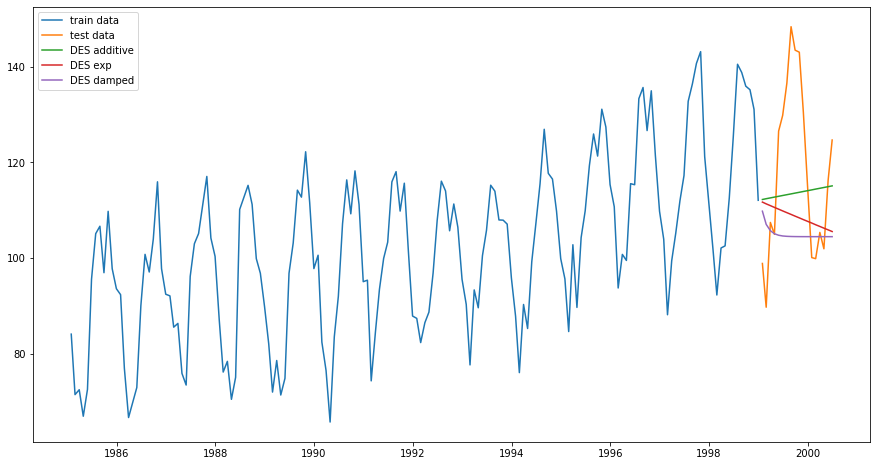

In [23]:
#visualizing the results
plt.plot(train_data,label='train data')
plt.plot(test_data,label='test data')
plt.plot(DES_fcast1,label='DES additive')
plt.plot(DES_fcast2,label='DES exp')
plt.plot(DES_fcast3,label='DES damped')
plt.legend()
plt.show()

As we are already familiar that our dataset has a **linear trend** therefore **additive DES** provides the best result. Above prediction is better than **SES** in terms of upward trend it catched as shown in above plot. Since trend is not exponential, therefore exponential DES gives poorer results. Also damping method fails here because we are dealing with very small test set. These results are also established by RMS error score below.

In [24]:
DES_rmse1 = np.sqrt(mean_squared_error(test_data,DES_fcast1))
DES_rmse2 = np.sqrt(mean_squared_error(test_data,DES_fcast2))
DES_rmse3 = np.sqrt(mean_squared_error(test_data,DES_fcast3))
print("RMS Error for additive DES: ",DES_rmse1)
print("RMS Error for multiplicative DES: ",DES_rmse2)
print("RMS Error for damped DES: ",DES_rmse3)

RMS Error for additive DES:  17.907390609090132
RMS Error for multiplicative DES:  19.92290134647064
RMS Error for damped DES:  22.156052714353567


## Triple Exponential Smoothing(Holt's Winters Exponential Smoothing)
Triple Exponential Smoothing is an extension of Double Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.
In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (γ) that controls the influence on the seasonal component.

As with the trend, the seasonality may be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.
> **Multiplicative Seasonality:** the seasonal variations are changing proportionally to the level of the series.<br>
> **Additive Seasonality:** the seasonal variations are roughly constant throughout the series.<br>
#### Hyperparameters
> **• $\alpha$ :** smoothing factor for the level<br>
> **• $\beta$ :** smoothing factor for the trend<br>
> **• $\gamma$ :** smoothing factor for the seasonality<br>
> **• Trend Type:** additive or multiplicative<br>
> **• Seasonality Type:** additive or mutiplicative<br>
> **• Period:** time steps in seasonal period

### Multiplicative Seasonality
The governing equations for the H-W multiplicative method are:
\begin{align*}
\text{Level: }   \; \quad \ell_t  &=  \alpha \frac{y_t}{s_{t-m}} + (1-\alpha) (\ell_{t-1} + b_{t-1}) \\
\text{Growth: }   \; \quad b_t  &= \beta^* (\ell_t - \ell_{t-1}) + (1-\beta^*) b_{t-1} \\
\text{Seasonal: } \; \quad  s_t &= \gamma  \frac{y_t}{\ell_{t-1} + b_{t-1}} + (1-\gamma) s_{t-m} \\
\text{Forecast: }\;  \hat{y}_{t+h|t}  &= (\ell_t + b_t h ) s_{t-m+h_m^+}
\end{align*}<br>
Here  $m$  is the seasonal period,$ \ell_t$,$b_t$  are as before, $ s_t $ is the seasonal component, and$h_m^+=\lfloor(h−1)\mod m\rfloor +1 $. The parameters  ($\alpha$, $\beta^∗ $ and $\gamma$)  are usually restricted to lie between 0 and 1.

### Additive Seasonality
The governing equations for the H-W additive method are:
\begin{align*}
\text{Level: }   \; \quad \ell_t  &=  \alpha (y_t - s_{t-m}) + (1-\alpha) (\ell_{t-1} + b_{t-1}) \\
\text{Growth: }   \; \quad b_t  &= \beta^* (\ell_t - \ell_{t-1}) + (1-\beta^*) b_{t-1} \\
\text{Seasonal: } \; \quad  s_t &= \gamma  ( y_t - \ell_{t-1} - b_{t-1})  + (1-\gamma) s_{t-m} \\
\text{Forecast: }\;  \hat{y}_{t+h|t}  &=  \ell_t + b_t h  +  s_{t-m+h_m^+}
\end{align*}<br>
The Growth equation remains the same but the others have replaced seasonal products and ratios with additions and subtractions.

### Visualizing Seasonality and trend

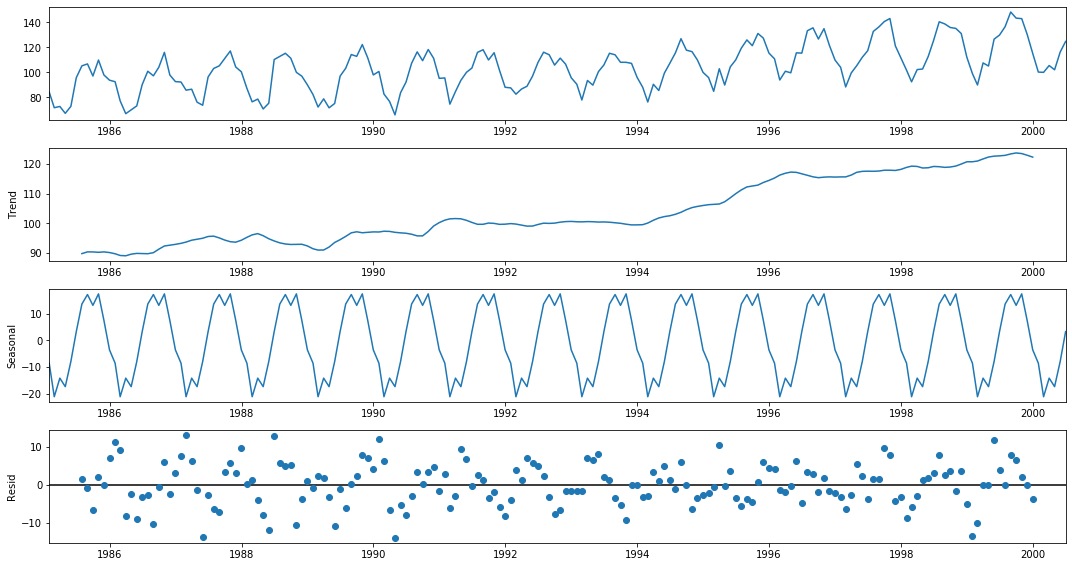

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df).plot();

From the above plot, we can visualize that our dataset has approximately linear (increasing) trend and and seasonality 
(or seasonal period) of 12 months.

Here we run four variants of **Triple Exponential Smoothing(TES)** applying every combination of trend and seasonality.
> **•TES_fit1:** we used additive trend and additive seasonality<br>
> **•TES_fit2:** we used additive trend and multiplicative seasonality<br>
> **•TES_fit1:** we used additive trend and additive seasonality with damping<br>
> **•TES_fit1:** we used additive trend and multiplicative seasonality with seasonality


### Fitting and Forecasting(TES)

In [26]:
#fitting and forecasting
TES_fit1 = ExponentialSmoothing(train_data, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
TES_fcast1=TES_fit1.forecast(18)

In [27]:
TES_fit2 = ExponentialSmoothing(train_data, seasonal_periods=12, trend='add', seasonal='mul').fit(use_boxcox=True)
TES_fcast2=TES_fit2.forecast(18)

In [28]:
TES_fit3 = ExponentialSmoothing(train_data, seasonal_periods=12, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
TES_fcast3=TES_fit3.forecast(18)

In [29]:
TES_fit4 = ExponentialSmoothing(train_data, seasonal_periods=12, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
TES_fcast4=TES_fit4.forecast(18)

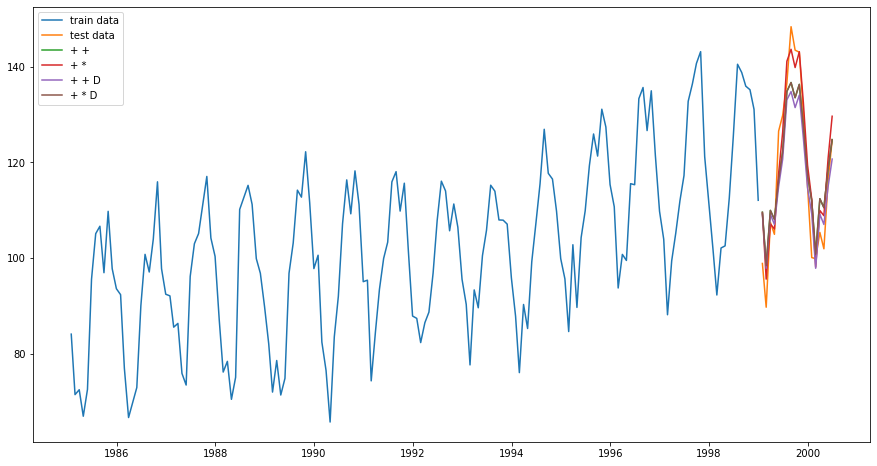

In [30]:
#visualizing the results
plt.plot(train_data,label='train data')
plt.plot(test_data,label='test data')
plt.plot(TES_fcast1,label='+ +')
plt.plot(TES_fcast2,label='+ *')
plt.plot(TES_fcast3,label='+ + D')
plt.plot(TES_fcast1,label='+ * D')
plt.legend()
plt.show()

From the above plot, we can observe that TES provides the most reliable results for a data having trends and seasonality.

In [31]:
TES_rmse1 = np.sqrt(mean_squared_error(test_data,TES_fcast1))
TES_rmse2 = np.sqrt(mean_squared_error(test_data,TES_fcast2))
TES_rmse3 = np.sqrt(mean_squared_error(test_data,TES_fcast3))
TES_rmse4 = np.sqrt(mean_squared_error(test_data,TES_fcast4))

In [32]:
print("RMS Error for additive trend and additive seasonality: ",TES_rmse1)
print("RMS Error for additive trend and multiplicative seasonality : ",TES_rmse2)
print("RMS Error for additive trend and additive seasonality with damping : ",TES_rmse3)
print("RMS Error for additive trend and multiplicative seasonality with damping : ",TES_rmse4)

RMS Error for additive trend and additive seasonality:  7.209851167900671
RMS Error for additive trend and multiplicative seasonality :  5.678560988286612
RMS Error for additive trend and additive seasonality with damping :  7.413174896516315
RMS Error for additive trend and multiplicative seasonality with damping :  7.23301890933785


Hence,Triple Exponential Smoothing with additive trend and multiplicative seasonality with no damping provides the most optimal results(and the least RMSE) for our dataset.

## Conclusion
Exponential Smoothing Model can be of great important for time-series forecasting with data having trend and seasonality. Which form of exponential smoothing will prove to be best, depends on data trend and seasonality and also on length of our test set, So exploratory data analysis can be of significant importance for larger datasets exhibiting patterns of different kinds.